# CNRR and GPM IMERG/ MSWEP  

This notebook examines compares the high resolution satellite precip datasets GPM IMERG/MSWEP with CNRR, in order to see whether observed precipitation patterns (storms) are captured by the reanalysis (whichi then can be used for further analysis)

# Basic statistics

In [3]:
import numpy as np 
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import glob
%matplotlib inline


def read_in_netcdf(file, param):
    dataset = Dataset(file)    
    precip= np.array(dataset[str(param)])
    dataset.close()
    return precip

## Histogram 

In [37]:
#  plot histogram based on bins and heights (output from np.histogram)

def plot_histograms(heights,heights2, bins, bins2): 
    a= np.sum(heights)
    b= np.sum(heights2)
    
    plt.style.use('seaborn')
    plt.rcParams.update({'font.size': 35,
                 'xtick.labelsize' : 35,
                 'ytick.labelsize' : 35})
    plt.figure(figsize=(20, 17))

    plt.subplot(2,2,1)
    plt.title('GPM', fontsize= '30')
    plt.bar(bins[:-1], (heights/a)*100, width = 1.0, color= 'k')
    plt.ylabel('Frequency (%)', fontsize= 35)
    plt.xlabel('Rain rates (mm/hr)', fontsize= 35)
    plt.xlim(0,10)
    plt.ylim(0,50)
    
    plt.subplot(2,2,2)
    plt.title('CNRR', fontsize= '30')
    plt.bar(bins2[:-1], (heights2/b)*100, width = 1.0, color= 'k')
    plt.ylabel('Frequency (%)', fontsize= 35)
    plt.xlabel('Rain rates (mm/hr)', fontsize= 35)
    plt.xlim(0,10)
    plt.ylim(0,50)
    
    plt.savefig('/media/juli/Elements/comparison/histogram_gpm_cnrr.pdf')

In [8]:
file_list= glob.glob('/media/juli/Elements/GPM_IMERG_F_v05/GPM_finalrun/high_resolution/3B-HHR*.nc4')  

In [10]:
# GPM, calculate occurrences 
nbins = 100
heights = np.zeros((nbins,))
i = 0 
for file in file_list:
    precip= read_in_netcdf(file, param='precipitationCal')
    h, b   = np.histogram(precip[precip > 0.1], bins = nbins)
    bins = b
    heights += h
    i += 1
    if i % 10000 == 0:
        print(i)
    

10000
20000
30000
40000
50000
60000
70000


In [20]:
file_list_cnrr= glob.glob('/media/juli/Data/third_pole/CNRR/data/2014_2016/cnrr*.nc4')  

In [21]:
# CNRR, calculate occurrences
nbins = 100
heights2 = np.zeros((nbins,))
i = 0 
for file in file_list_cnrr:
    precip= read_in_netcdf(file, param='prcp')
    h, b   = np.histogram(precip[precip > 0.1], bins = nbins)
    bins2 = b
    heights2 += h
    i += 1
    if i % 10000 == 0:
        print(i)
    

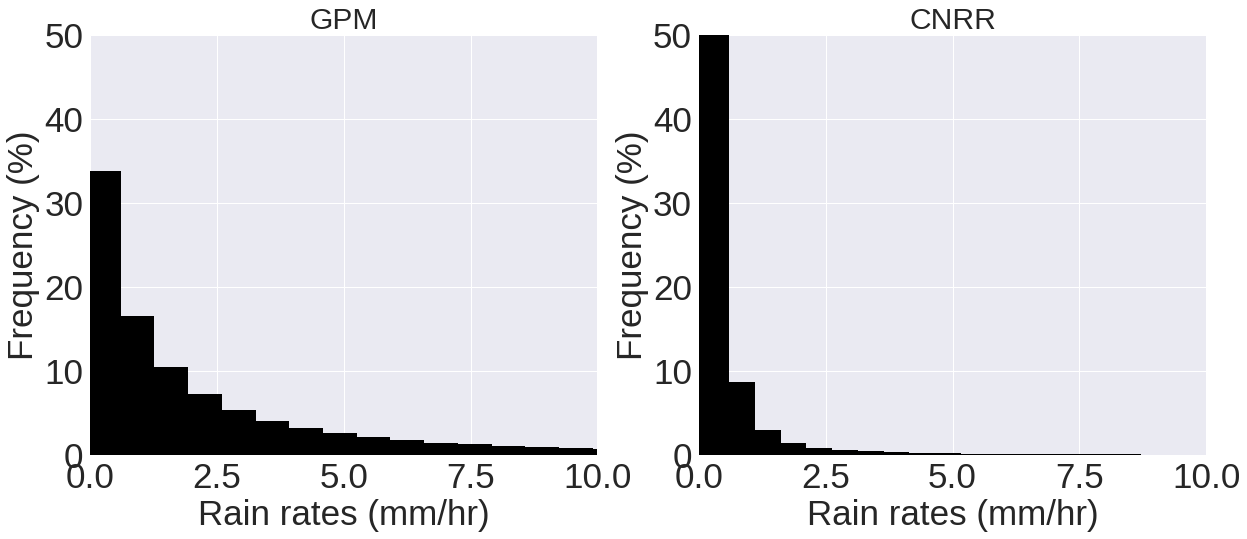

In [38]:
# plot histograms
plot_histograms(heights, heights2,bins, bins2)








## Summer mean precip 

## Extreme precip 

# Cloud tracking (tobac)

- select 100 longest/heaviest/largest storms between 2014 -- 2017 and compare whether these are captured in both datasets 

- look at general storm statistics (speeds, intensity, etc) and spatial distribution 

- concentrate on the elevations > 3000 m ASL 